In [2]:
import json
import pandas as pd
import re
import seaborn as sns
from datetime import date
%matplotlib inline

In [58]:
#Loading the Dataset
df = pd.read_json(r'C:\Users\Sumanth\Desktop\ol_cdump.json',lines = True)

In [4]:
#Dataset Schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148163 entries, 0 to 148162
Data columns (total 77 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   latest_revision      148163 non-null  int64  
 1   revision             148163 non-null  int64  
 2   title                146852 non-null  object 
 3   languages            140960 non-null  object 
 4   subjects             97613 non-null   object 
 5   publish_country      132102 non-null  object 
 6   by_statement         106091 non-null  object 
 7   type                 148163 non-null  object 
 8   location             17401 non-null   object 
 9   other_titles         25664 non-null   object 
 10  publishers           136729 non-null  object 
 11  last_modified        148163 non-null  object 
 12  key                  148163 non-null  object 
 13  authors              145622 non-null  object 
 14  publish_places       135581 non-null  object 
 15  oclc_number      

<AxesSubplot:>

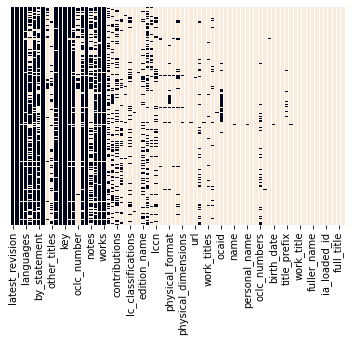

In [4]:
#Observing the null values (indicated by the black spread)
sns.heatmap(df.isnull(),yticklabels=False, cbar = False)

In [5]:
df.columns

Index(['latest_revision', 'revision', 'title', 'languages', 'subjects',
       'publish_country', 'by_statement', 'type', 'location', 'other_titles',
       'publishers', 'last_modified', 'key', 'authors', 'publish_places',
       'oclc_number', 'pagination', 'created', 'notes', 'number_of_pages',
       'publish_date', 'works', 'subtitle', 'series', 'contributions',
       'genres', 'table_of_contents', 'lc_classifications', 'subject_places',
       'first_publish_date', 'edition_name', 'isbn_10', 'dewey_decimal_class',
       'lccn', 'identifiers', 'weight', 'physical_format', 'covers', 'isbn_13',
       'physical_dimensions', 'uri_descriptions', 'uris', 'url',
       'source_records', 'first_sentence', 'work_titles', 'description',
       'subject_times', 'ocaid', 'download_url', 'dewey_number', 'name',
       'subject_place', 'subject_people', 'personal_name', 'alternate_names',
       'photos', 'oclc_numbers', 'copyright_date', 'classifications',
       'birth_date', 'bio', 'links

In [59]:
# Extracting just the Year from the Date column
df['publish_date'] = df['publish_date'].astype('str')
def date_extract(dd):
    if re.search('(\d\d\d\d)', dd):
        return re.search('(\d\d\d\d)', dd)[1]
    else:
        return "NA"

df['publish_date'] = df['publish_date'].apply(date_extract)# df['authors']
df['publish_date'].head()

0    1975
1    1976
2    1977
3    1964
4    1955
Name: publish_date, dtype: object

In [60]:
# Cleaning the Author field to extract just the Author code from other text
df=df.dropna(subset=['authors'])

df['authors']= df['authors'].astype('str')

def author_extract(name):
    if re.search('authors/(.*)\'}]', name):
        return re.search('authors/(.*)\'}]', name)[1]
    else:
        return "NA"

df['authors'] = df['authors'].apply(author_extract)# df['authors']


In [6]:
df['authors'].head()

0    OL6535896A
1    OL6535897A
2    OL6535898A
3    OL5900510A
4     OL135548A
Name: authors, dtype: object

In [61]:
today = date.today()
d1 = today.strftime("%Y")
fd =str(int(d1)+3)

In [62]:

# Cleaning Data to eliminate records where the number of pages are less than 20 and published before 1950 and after 'current data + 3 years'
df = df[(df['number_of_pages'] > 20) & (df['publish_date'] > '1950') & (df['publish_date'] < fd)]
df

,latest_revision,revision,title,languages,subjects,publish_country,by_statement,type,location,other_titles,...,contributors,purchase_url,fuller_name,website,isbn_invalid,ia_loaded_id,isbn_odd_length,ia_box_id,full_title,excerpts
0,2,2,The effect of differentiated marking tools and...,[{'key': '/languages/eng'}],"[Creative thinking -- Testing, Educational psy...",gau,by Lillian Rose Arnold,{'key': '/type/edition'},[NBuC],"[Marking tools, Motivational treatment]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Comparison of the nominal grouping and sequenc...,[{'key': '/languages/eng'}],"[Problem solving, Group problem solving, Socia...",lau,by Walter Edward Stead,{'key': '/type/edition'},[NBuC],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Professional accident investigation,[{'key': '/languages/eng'}],"[Industrial accidents -- Investigation, Indust...",gau,by Raymond L. Kuhlman,{'key': '/type/edition'},[NBuC],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,I chauceriani scozzesi,[{'key': '/languages/ita'}],"[English poetry -- Scottish authors, Scottish ...",it,a cura di Sergio Rossi,{'key': '/type/edition'},[NBuC],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,Lezioni zurighesi sul Petrarca,[{'key': '/languages/ita'}],"[Petrarca, Francesco, -- 1304-1374]",it,Francesco de Sanctis ; a cura di Sergio Romagnoli,{'key': '/type/edition'},[NBuC],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148158,2,2,Duzakhi-ha,[{'key': '/languages/per'}],NaN,ir,Parviz Qazi Said.,{'key': '/type/edition'},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148159,3,3,Visitor survey,[{'key': '/languages/eng'}],"[San Francisco Zoo (San Francisco, Calif.), Zo...",cau,prepared and submitted by Esherick Homsey Dodg...,{'key': '/type/edition'},NaN,[Plan for the San Francisco Zoological Gardens...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148160,2,2,Lavsun dar ashiyanih yi marg,[{'key': '/languages/per'}],NaN,ir,Parviz Qazi Said.,{'key': '/type/edition'},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148161,2,2,Fun with Chinese horoscopes,[{'key': '/languages/eng'}],[Horoscopes.],si,written and illustrated by Evelyn Lip.,{'key': '/type/edition'},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Calculating the percentage of null values in each column
df.isnull().mean()*100

latest_revision      0.000000
revision             0.000000
title                0.000000
languages            0.594290
subjects            28.173755
                      ...    
ia_loaded_id       100.000000
isbn_odd_length    100.000000
ia_box_id          100.000000
full_title          99.998705
excerpts           100.000000
Length: 77, dtype: float64

In [64]:
# Removing columns where null values are greater than 80%
df = df.drop(df.columns[df.apply(lambda col: col.isnull().mean()*100 > 80)], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77235 entries, 0 to 148162
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latest_revision     77235 non-null  int64  
 1   revision            77235 non-null  int64  
 2   title               77235 non-null  object 
 3   languages           76776 non-null  object 
 4   subjects            55475 non-null  object 
 5   publish_country     71435 non-null  object 
 6   by_statement        63446 non-null  object 
 7   type                77235 non-null  object 
 8   other_titles        17900 non-null  object 
 9   publishers          74872 non-null  object 
 10  last_modified       77235 non-null  object 
 11  key                 77235 non-null  object 
 12  authors             77235 non-null  object 
 13  publish_places      73118 non-null  object 
 14  pagination          75135 non-null  object 
 15  created             75498 non-null  object 
 16  not

In [28]:
df

,latest_revision,revision,title,languages,subjects,publish_country,by_statement,type,other_titles,publishers,...,publish_date,works,subtitle,series,contributions,genres,lc_classifications,edition_name,isbn_10,lccn
0,2,2,The effect of differentiated marking tools and...,[{'key': '/languages/eng'}],"[Creative thinking -- Testing, Educational psy...",gau,by Lillian Rose Arnold,{'key': '/type/edition'},"[Marking tools, Motivational treatment]",[University of Georgia],...,1975,[{'key': '/works/OL13681062W'}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Comparison of the nominal grouping and sequenc...,[{'key': '/languages/eng'}],"[Problem solving, Group problem solving, Socia...",lau,by Walter Edward Stead,{'key': '/type/edition'},NaN,[Louisiana State University],...,1976,[{'key': '/works/OL13681063W'}],a field study,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Professional accident investigation,[{'key': '/languages/eng'}],"[Industrial accidents -- Investigation, Indust...",gau,by Raymond L. Kuhlman,{'key': '/type/edition'},NaN,[Institute Press],...,1977,[{'key': '/works/OL13681064W'}],investigative methods and techniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,I chauceriani scozzesi,[{'key': '/languages/ita'}],"[English poetry -- Scottish authors, Scottish ...",it,a cura di Sergio Rossi,{'key': '/type/edition'},NaN,[Edizioni Scientifiche Italiane],...,1964,[{'key': '/works/OL12983281W'}],NaN,"[Collana di letterature moderne ; 20, Collana ...",NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,Lezioni zurighesi sul Petrarca,[{'key': '/languages/ita'}],"[Petrarca, Francesco, -- 1304-1374]",it,Francesco de Sanctis ; a cura di Sergio Romagnoli,{'key': '/type/edition'},NaN,[Liviana Editrice],...,1955,[{'key': '/works/OL1330425W'}],e altri scritti,"[Collana di testi e documenti, Collana di test...","[Romagnoli, Sergio]",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148158,2,2,Duzakhi-ha,[{'key': '/languages/per'}],NaN,ir,Parviz Qazi Said.,{'key': '/type/edition'},NaN,[Musassihsih yi Asia],...,2003,[{'key': '/works/OL13724799W'}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148159,3,3,Visitor survey,[{'key': '/languages/eng'}],"[San Francisco Zoo (San Francisco, Calif.), Zo...",cau,prepared and submitted by Esherick Homsey Dodg...,{'key': '/type/edition'},[Plan for the San Francisco Zoological Gardens...,[Esherick Homsey Dodge and Davis],...,1976,[{'key': '/works/OL13708034W'}],a plan for the San Francisco Zoological Gardens,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148160,2,2,Lavsun dar ashiyanih yi marg,[{'key': '/languages/per'}],NaN,ir,Parviz Qazi Said.,{'key': '/type/edition'},NaN,[Musassihsih yi Asia],...,2001,[{'key': '/works/OL13724800W'}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148161,2,2,Fun with Chinese horoscopes,[{'key': '/languages/eng'}],[Horoscopes.],si,written and illustrated by Evelyn Lip.,{'key': '/type/edition'},NaN,[Graham Brash],...,1987,[{'key': '/works/OL2422992W'}],NaN,NaN,NaN,NaN,NaN,3rd ed.,[9971947110],NaN


### Question 1

In [65]:
# Question is to select all Harry Potter books. Looking at the cleaned data set, we have more than 1 key value pair with Harry Potter
#key Value pair. Hence going with assumption that the books to betrieved has 'Harry Potter' in their title.
dfQ1 = df
dfQ1['title'].dropna()
dfQ1[dfQ1['title'].str.contains("Harry Potter",na=False)]['title']

52860     Harry Potter and the philosopher's stone
53859           Harry Potter y la piedra filosofal
119571                 The Science of Harry Potter
Name: title, dtype: object

### Question 2

In [7]:
# To retrive the book with the maximum number of pages
df[df.number_of_pages == df.number_of_pages.max()]['title']

51907    Nihon shokuminchi kenchikuron
Name: title, dtype: object

In [31]:
df[df['number_of_pages']>df.number_of_pages.mean()+6*df.number_of_pages.std()].describe()

,latest_revision,revision,number_of_pages
count,66.000000,66.000000,66.000000
mean,2.227273,2.227273,5222.196970
std,0.602443,0.602443,6878.230654
min,2.000000,2.000000,2110.000000
25%,2.000000,2.000000,2263.250000
50%,2.000000,2.000000,2663.500000
75%,2.000000,2.000000,4270.000000
max,5.000000,5.000000,48418.000000


### Question 3

In [54]:
# To find the Top 5 authors with most written books
dfQ3 = df[['title','authors','by_statement']]
dfQ3[dfQ3['authors']=='OL1224818A']['by_statement'].dropna().unique()
#dfQ4=dfQ3.groupby(['authors']).size().sort_values(ascending=False).head()
#dfQ4
#df[dfQ4['authors']]['by_statement']

array(['Department of Water Resources.',
       'The Resources Agency of California, Department of Water Resources.',
       'State of California, Department of Water Resources.',
       'by Department of Parks and Recreation.',
       'by Department of Fish and Game, Water Projects Branch, Contract Services Section.',
       'State of California, Dept. of Water Resources, The Resources Agency.',
       'State of California, The Resources Agency, Dept. of Water Resources.',
       'State of California, the Resources Agency, Department of Water Resources.',
       'California Dept. of Water Resources.', '[by Joseph B. Knox]',
       'by Department of Public Health, Division of Environmental Sanitation [and] Department of Health, Division of Laboratories.'],
      dtype=object)

### Question 4

In [23]:
# To find ind the top 5 genres with most books
dfQ4 = df[['genres','title']]
dfQ4




,genres,title
0,NaN,The effect of differentiated marking tools and...
1,NaN,Comparison of the nominal grouping and sequenc...
2,NaN,Professional accident investigation
3,NaN,I chauceriani scozzesi
4,NaN,Lezioni zurighesi sul Petrarca
...,...,...
148158,NaN,Duzakhi-ha
148159,NaN,Visitor survey
148160,NaN,Lavsun dar ashiyanih yi marg
148161,NaN,Fun with Chinese horoscopes


In [24]:
dfQ4=dfQ4.dropna(subset=['genres'])
dfQ4['new_genre'] = [','.join(map(str, l)) for l in dfQ4['genres']]
dfQ4

<ipython-input-24-a429287ae3f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ4['new_genre'] = [','.join(map(str, l)) for l in dfQ4['genres']]


,genres,title,new_genre
5,[Early works to 1800],El saber ginecologico del padre Feijoo,Early works to 1800
13,"[Outlines, syllabi, etc]",Adventuring with books,"Outlines, syllabi, etc"
15,[Bibliography],Selected and annotated bibliography on the sta...,Bibliography
22,[Conversation and phrase books],Esercizi e conversazioni di lingua viva,Conversation and phrase books
23,[Texts],Amal'ezulu,Texts
...,...,...,...
148141,"[Juvenile literature., Literatura juvenil.]",Todo lo que necesitas saber cuando alguien a q...,"Juvenile literature.,Literatura juvenil."
148147,[Conversation and phrase books],Dutch phrase book,Conversation and phrase books
148149,[Dictionaries],An English-Arabic lexicon,Dictionaries
148152,[Fiction.],Olâgh-e nâdân,Fiction.


In [25]:
dfQ4['sorted_genre'] = dfQ4['new_genre'].str.split(',')
dfQ4=dfQ4.drop(['genres','new_genre'],axis=1)
dfQ4

<ipython-input-25-dc8fc6bf1799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfQ4['sorted_genre'] = dfQ4['new_genre'].str.split(',')


,title,sorted_genre
5,El saber ginecologico del padre Feijoo,[Early works to 1800]
13,Adventuring with books,"[Outlines, syllabi, etc]"
15,Selected and annotated bibliography on the sta...,[Bibliography]
22,Esercizi e conversazioni di lingua viva,[Conversation and phrase books]
23,Amal'ezulu,[Texts]
...,...,...
148141,Todo lo que necesitas saber cuando alguien a q...,"[Juvenile literature., Literatura juvenil.]"
148147,Dutch phrase book,[Conversation and phrase books]
148149,An English-Arabic lexicon,[Dictionaries]
148152,Olâgh-e nâdân,[Fiction.]


In [20]:
dfQ4['sorted_genre']

5                               [Early works to 1800]
13                         [Outlines,  syllabi,  etc]
22                    [Conversation and phrase books]
23                                            [Texts]
32                                          [Readers]
                             ...                     
148132                                 [Dictionaries]
148135                                 [Dictionaries]
148138                   [Handbooks,  manuals,  etc.]
148141    [Juvenile literature., Literatura juvenil.]
148147                [Conversation and phrase books]
Name: sorted_genre, Length: 16483, dtype: object

In [ ]:
dfQ41 = dfQ4.explode('sorted_genre')
dfQ41['sorted_genre'] = dfQ41['sorted_genre'].str.strip()
dfQ41['sorted_genre'] = [i[:-1]  if i[-1]=='.' else i for i in dfQ41['sorted_genre']]
dfQ41 = dfQ41.drop(dfQ41[dfQ41.sorted_genre=='etc'].index)
dfQ41.groupby(['sorted_genre']).size().sort_values(ascending=False).head()

### Question 5

In [19]:
# To get the avg. number of pages
round(df['number_of_pages'].mean(),2)

231.82

### Question 6

In [57]:
# Per publish year, get the number of authors that published at least one book
df.groupby(['publish_date']).size().sort_values(ascending=False)

publish_date
2008    4116
1995    2691
1997    2581
2007    2495
1998    2445
        ... 
1953     623
1955     612
2009     209
2010       2
2011       1
Length: 61, dtype: int64

In [66]:
df.number_of_pages.describe()

count    77235.000000
mean       231.819369
std        306.714261
min         21.000000
25%        104.000000
50%        197.000000
75%        294.000000
max      48418.000000
Name: number_of_pages, dtype: float64